Wgrywanie biblioteki do obsługi datasetu

In [ ]:
!pip install --upgrade nibabel

     |████████████████████████████████| 3.3MB 12.2MB/s 
  Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


Wgrywanie datasetu i rozpakowanie

In [ ]:
!wget "https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1" -O public.zip
!unzip -q public.zip
!rm public.zip

Zapis na dysk zipa

In [ ]:
!wget "https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1" -O public.zip
!mv /content/public.zip /content/drive/My\ Drive/Projekt\ 2


--2020-08-08 11:31:59--  https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1
Resolving putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)... 13.107.136.9
Connecting to putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?&originalPath=aHR0cHM6Ly9wdXRwb3puYW5wbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb21pbmlrX3BpZWN6eW5za2lfcHV0X3Bvem5hbl9wbC9FV0laX3htOHdYcE1qUURnRjJWUTFjc0I0UXVIUEtvajV2RHBqNkNRaTlwLUFBP3J0aW1lPThpUExxWTQ3MkVn [following]
--2020-08-08 11:31:59--  https://putpoznanpl-my.sharepoint.com/personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?&originalPath=aHR0cHM6Ly9wdXRwb3puYW5wbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb21pbmlrX3BpZWN6eW5za2lfcHV0X3Bvem5hbl9wbC9FV0laX3htOHdYcE1qUUR

Rozpakowanie zipa - Start

In [ ]:
!unzip -q /content/drive/My\ Drive/Projekt\ 2/public.zip

Zapisywanie ścieżek do plików

In [ ]:
from typing import Tuple, List
import os
import numpy as np
from pathlib import Path

def save_path_1(dataset_dir_path: str) -> Tuple[List[str], List[str]]:
    x, y = [], []
    for i, class_dir in enumerate(sorted(os.listdir(dataset_dir_path))):
        if Path(class_dir).name.endswith('mask.nii.gz'):
           mask_patch = os.path.join(dataset_dir_path, class_dir)
           y.append(mask_patch)
           #print(mask_patch)
        else:
           img_patch = os.path.join(dataset_dir_path, class_dir)
           x.append(img_patch)
           #print(img_patch)
    return x, y

def save_path_2(dataset_dir_path: str) -> Tuple[List[str], List[str]]:
    x, y = [], []
    for i, class_dir in enumerate(sorted(os.listdir(dataset_dir_path))):
        img_patch = os.path.join(dataset_dir_path, class_dir, 'T1w.nii.gz')
        mask_patch = os.path.join(dataset_dir_path, class_dir, 'mask.nii.gz')
        x.append(img_patch)
        y.append(mask_patch)
    return x, y

path_X_1, path_y_1 = save_path_1('/content/FirstDataset/train')
path_X_2, path_y_2 = save_path_2('/content/SecondDataset/train')
path_X = path_X_1 + path_X_2
path_y = path_y_1 + path_y_2
print(len(path_X), len(path_y), len(path_X_1), len(path_y_1), len(path_X_2), len(path_y_2))

387 387 287 287 100 100


Podział na zbiór treningowy i walidacyjny

In [ ]:
from sklearn.model_selection import train_test_split

path_X_train, path_X_val, path_y_train, path_y_val = train_test_split(
    path_X, path_y, test_size=0.15, random_state=42)
print(len(path_X_train), len(path_X_val), len(path_y_train), len(path_y_val))
for i in range(len(path_y_val)):
    print(path_y_val[i])

328 59 328 59
/content/SecondDataset/train/506d0406e0105cc27d1dcc0eb0d676c5/mask.nii.gz
/content/FirstDataset/train/8c9fe7f6db1ccc6a646dbed5292b64f4_mask.nii.gz
/content/FirstDataset/train/51c1153ed41c0437f5ff9dd1adee9080_mask.nii.gz
/content/FirstDataset/train/eb2ebca2c6a7dd87de9e1d3b783d226b_mask.nii.gz
/content/FirstDataset/train/b76e06ed30fcb27a2f39d61f5f12b713_mask.nii.gz
/content/SecondDataset/train/2646428696d25bdc99ca55738879f685/mask.nii.gz
/content/FirstDataset/train/4abaa67b2638e479f302cf82eaf074cb_mask.nii.gz
/content/FirstDataset/train/5b218b1dc9e7dc7e3f5012b42779e88b_mask.nii.gz
/content/FirstDataset/train/fd90fbcf1edcdd8f5f24751db05f3c45_mask.nii.gz
/content/FirstDataset/train/25a4d9cad364b5ecdfa8cd4191955c55_mask.nii.gz
/content/FirstDataset/train/4750ba54b682be8a877af7bc147c3242_mask.nii.gz
/content/FirstDataset/train/4fa05bac7cd34856c79fa1a32347c8e3_mask.nii.gz
/content/FirstDataset/train/ce43d5f1707475e85f864ffafeb16d12_mask.nii.gz
/content/FirstDataset/train/31a1d5a

Zapis ścieżek do zbioru testowego

In [ ]:
from typing import Tuple, List
import os
import numpy as np
from pathlib import Path

def save_testpath_1(dataset_dir_path: str) -> List[str]:
    x, y = [], []
    for i, class_dir in enumerate(sorted(os.listdir(dataset_dir_path))):
        img_patch = os.path.join(dataset_dir_path, class_dir)
        x.append(img_patch)
        #print(img_patch)
    return x

def save_testpath_2(dataset_dir_path: str) -> List[str]:
    x, y = [], []
    for i, class_dir in enumerate(sorted(os.listdir(dataset_dir_path))):
        img_patch = os.path.join(dataset_dir_path, class_dir, 'T1w.nii.gz')
        x.append(img_patch)
    return x

path_X_test_1 = save_testpath_1('/content/FirstDataset/test')
path_X_test_2 = save_testpath_2('/content/SecondDataset/test')
path_X_test = path_X_test_1 + path_X_test_2

print(len(path_X_test), len(path_X_test_1), len(path_X_test_2))
for i in range(len(path_X_test)):
    print(path_X_test[i])

97 72 25
/content/FirstDataset/test/026719ab1b8e2af45a41ee5b629a12bd.nii.gz
/content/FirstDataset/test/03453fb1d5c8eb73d501cbf2e913e9ef.nii.gz
/content/FirstDataset/test/073ca51b6f1b2baa300ca47dbf10ea02.nii.gz
/content/FirstDataset/test/07651dc2bafb71d6f3de109a5610160f.nii.gz
/content/FirstDataset/test/11a79c48577d879e9d52a874df3c0184.nii.gz
/content/FirstDataset/test/11b2fda921661f5a244ad3838689d007.nii.gz
/content/FirstDataset/test/1745516560ec9e5ab461eb971ea00f29.nii.gz
/content/FirstDataset/test/1992cabe5774b6abd050f8dc7c8247e9.nii.gz
/content/FirstDataset/test/1c3064790751e45d903399e9998af51b.nii.gz
/content/FirstDataset/test/1f405c35c19d7426131d8c8021ed7e3c.nii.gz
/content/FirstDataset/test/1fd6fd84052d08152830a735dc749965.nii.gz
/content/FirstDataset/test/2c10e47f4b17b611666ca076d7b04024.nii.gz
/content/FirstDataset/test/3423ba333d3e07ba3492324dbe424827.nii.gz
/content/FirstDataset/test/372af0b53b7ee53a6f53472ad88d8965.nii.gz
/content/FirstDataset/test/3d477c3f6dbf4219c41c72ac0c

Deklaracja funkcji do obsługi plików z datasetu

In [ ]:
import numpy as np
import nibabel as nib

from typing import Tuple, List
from pathlib import Path



def load_raw_volume(path: Path) -> Tuple[np.ndarray, np.ndarray]:
  data: nib.Nifti1Image = nib.load(str(path))
  data = nib.as_closest_canonical(data)
  raw_data = data.get_fdata(caching='unchanged', dtype=np.float32)
  return raw_data, data.affine


def load_labels_volume(path: Path) -> np.ndarray:
  return load_raw_volume(path)[0].astype(np.uint8)


def save_labels(data: np.ndarray, affine: np.ndarray, path: Path):
  nib.save(nib.Nifti1Image(data, affine), str(path))


def show_slices(slices: List[np.ndarray]):
   fig, axes = plt.subplots(1, len(slices))
   for i, data_slice in enumerate(slices):
       axes[i].imshow(data_slice.T, cmap="gray", origin="lower")

Wyświetlanie przykładowych przekrojów

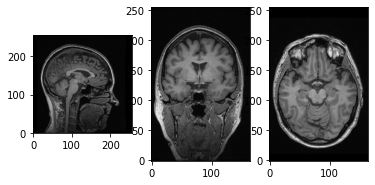

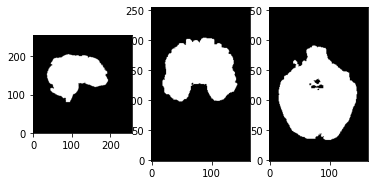

In [ ]:
import matplotlib.pyplot as plt

# Zmienna affine zawiera macierz, która będzie potrzebna przy zapisie predykcji do pliku
raw_volume, affine = load_raw_volume('/content/FirstDataset/train/e66ce7e96b277d7d1b8835e5d2c94cd6.nii.gz')
mask_volume = load_labels_volume('/content/FirstDataset/train/e66ce7e96b277d7d1b8835e5d2c94cd6_mask.nii.gz')

show_slices([raw_volume[raw_volume.shape[0] // 2], # Środkowy slice 2D w osi x
             raw_volume[:, raw_volume.shape[1] // 2], # Środkowy slice 2D w osi y
             raw_volume[:, :, raw_volume.shape[2] // 2]]) # Środkowy slice 2D w osi z

show_slices([mask_volume[mask_volume.shape[0] // 2], # Środkowy slice 2D w osi x
             mask_volume[:, mask_volume.shape[1] // 2], # Środkowy slice 2D w osi y
             mask_volume[:, :, mask_volume.shape[2] // 2]]) # Środkowy slice 2D w osi z


Obliczanie pola do paddingu

In [ ]:
padlist = np.resize([], (0, 3))

for i in range(len(path_X)):
    data, _ = load_raw_volume(path_X[i])
    vector = np.asarray(data.shape)
    padlist = np.concatenate((padlist, [vector]))

print(padlist, padlist.max(), padlist[:,0].max(), padlist[:,1].max(), padlist[:,2].max())
result = [padlist[:,0].max(), padlist[:,1].max(), padlist[:,2].max()]

KeyboardInterrupt: ignored

Wymiary do paddingu

In [ ]:
result = [256, 288, 288]

Zapis przekrojów na dysk i adresy folderów

In [ ]:
def pad(img, h, w):
    img = np.expand_dims(img , 2)
    #  in case when you have odd number
    top_pad = np.floor((h - img.shape[0]) / 2).astype(np.uint16)
    bottom_pad = np.ceil((h - img.shape[0]) / 2).astype(np.uint16)
    right_pad = np.ceil((w - img.shape[1]) / 2).astype(np.uint16)
    left_pad = np.floor((w - img.shape[1]) / 2).astype(np.uint16)
    result = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad), (0, 0)), mode='constant', constant_values=0)
    return np.copy(np.squeeze(result))

In [ ]:
import numpy as np
import nibabel as nib
import os
from typing import Tuple, List
from pathlib import Path
import shutil
from PIL import Image


def save_tv_slices(file_pathes: Tuple[List[str], List[str]], destination_path: str) -> Tuple[str, str]:
    images = file_pathes[0]
    labels = file_pathes[1]
    images_path = os.path.join(destination_path, 'images')
    labels_path = os.path.join(destination_path, 'labels')
    try:
        shutil.rmtree(destination_path)
    except OSError:
        print ("Decreation of the directory %s failed" % destination_path)
    else:
        print ("Successfully deleted the directory %s" % destination_path)
    os.makedirs(os.path.join(images_path, 'all_images'))
    os.makedirs(os.path.join(labels_path, 'all_labels'))
    ax_index = int(destination_path[-1])

    for i in range(len(file_pathes[0])):
        #print(i)
        data, _ = load_raw_volume(images[i])
        image3D = (255.0 / data.max() * (data - data.min())).astype(np.uint8)
        label3D = load_labels_volume(labels[i])
        #print(image3D.shape, type(label3D))
        #print((image3D.max()/np.mean(image3D)).round(2), '||', image3D.max().round(2), np.mean(image3D).round(2))
        for j in range(image3D.shape[ax_index]):
            #print(j)
            if ax_index == 0:
               im = image3D[j]
               la = label3D[j]
            elif ax_index == 1:
               im = image3D[:, j]
               la = label3D[:, j]
            else:
               im = image3D[:, :, j]
               la = label3D[:, :, j]
            name = str(i)+'_'+str(j)+'.png'
            image_path = os.path.join(images_path, 'all_images', name)
            label_path = os.path.join(labels_path, 'all_labels', name)
            im = pad(im, 288, 288)
            la = pad(la, 288, 288)
            data1 = Image.fromarray(im)
            data1.save(image_path)
            data2 = Image.fromarray(la)
            data2.save(label_path)
        print(i)
    return images_path, labels_path

paths_t = save_tv_slices((path_X_train[:20], path_y_train[:20]), '/content/drive/My Drive/Projekt 2/train_ax0')
paths_v = save_tv_slices((path_X_val[:3], path_y_val[:3]), '/content/drive/My Drive/Projekt 2/validation_ax0')

Decreation of the directory /content/drive/My Drive/Projekt 2/train_ax0 failed
0
1
2
3
4
5
6
7
9
10
11
12
13
14
15
16
17
18
19
Decreation of the directory /content/drive/My Drive/Projekt 2/validation_ax0 failed
0
1
2


Podgląd zapisanego pliku

(288, 288) (288, 288) 1


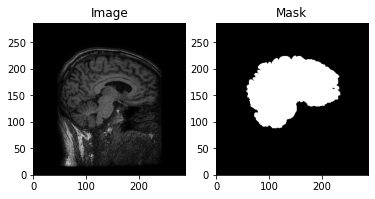

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_slice = cv2.imread('/content/drive/My Drive/Projekt 2/train_ax0/images/all_images/19_120.png', cv2.IMREAD_UNCHANGED)
mask_slice = cv2.imread('/content/drive/My Drive/Projekt 2/train_ax0/labels/all_labels/19_120.png', cv2.IMREAD_UNCHANGED)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(image_slice.T, cmap="gray", origin="lower")
axes[1].imshow(mask_slice.T, cmap="gray", origin="lower")
axes[0].set_title("Image")
axes[1].set_title("Mask")

print(image_slice.shape, mask_slice.shape, mask_slice.max())

Zapis obrazów z 3 osi do folderów w katalogu content

In [ ]:
paths_t_a0 = save_tv_slices((path_X_train, path_y_train), '/content/ax0/train_ax0')
paths_v_a0 = save_tv_slices((path_X_val, path_y_val), '/content/ax0/validation_ax0')
paths_t_a1 = save_tv_slices((path_X_train, path_y_train), '/content/ax1/train_ax1')
paths_v_a1 = save_tv_slices((path_X_val, path_y_val), '/content/ax1/validation_ax1')
paths_t_a2 = save_tv_slices((path_X_train, path_y_train), '/content/ax2/train_ax2')
paths_v_a2 = save_tv_slices((path_X_val, path_y_val), '/content/ax2/validation_ax2')

Utworzenie 3 zipów

In [ ]:
from zipfile import ZipFile 
import os 
  
def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths         
  
# path to folder which needs to be zipped 
directory = '/content/ax0'

# calling function to get all file paths in the directory 
file_paths = get_all_file_paths(directory) 
  
# printing the list of all files to be zipped 
print('Following files will be zipped:') 
for file_name in file_paths: 
    print(file_name) 
  
# writing files to a zipfile 
with ZipFile('ax0.zip','w') as zip: 
# writing each file one by one 
     for file in file_paths: 
         zip.write(file) 
  
print('All files zipped successfully!')

# path to folder which needs to be zipped 
directory = '/content/ax1'

# calling function to get all file paths in the directory 
file_paths = get_all_file_paths(directory) 
  
# printing the list of all files to be zipped 
print('Following files will be zipped:') 
for file_name in file_paths: 
    print(file_name) 
  
# writing files to a zipfile 
with ZipFile('ax1.zip','w') as zip: 
# writing each file one by one 
     for file in file_paths: 
         zip.write(file) 
  
print('All files zipped successfully!')  

# path to folder which needs to be zipped 
directory = '/content/ax2'

# calling function to get all file paths in the directory 
file_paths = get_all_file_paths(directory) 
  
# printing the list of all files to be zipped 
print('Following files will be zipped:') 
for file_name in file_paths: 
    print(file_name) 
  
# writing files to a zipfile 
with ZipFile('ax2.zip','w') as zip: 
# writing each file one by one 
     for file in file_paths: 
         zip.write(file) 
  
print('All files zipped successfully!')  

Przesłanie zipów na dysk googla

In [ ]:
!mv /content/ax0.zip /content/drive/My\ Drive/Projekt\ 2
!mv /content/ax1.zip /content/drive/My\ Drive/Projekt\ 2
!mv /content/ax2.zip /content/drive/My\ Drive/Projekt\ 2

# Start po zapisaniu plików

Rozpakowanie datasetu z dysku 

In [ ]:
!unzip -q /content/drive/My\ Drive/Projekt\ 2/ax0.zip
#!unzip -q /content/drive/My\ Drive/Projekt\ 2/ax1.zip
#!unzip -q /content/drive/My\ Drive/Projekt\ 2/ax2.zip
!unzip -q /content/drive/My\ Drive/Projekt\ 2/public.zip

replace FirstDataset/train/ca187bff525d7dec725f61d48b3197d2.nii.gz? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


Struktura sieci

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

def conv_block(x, num_filters):
    x = Conv2D(num_filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

In [ ]:
from keras.layers import Input, Conv2D
from keras.models import Model

def build_model():
    size = 288
    num_filters = [16, 32, 48, 64]
    inputs = Input((size, size, 1))

    skip_x = []
    x = inputs

    ## Encoder
    for f in num_filters:
        x = conv_block(x, f)
        skip_x.append(x)
        x = MaxPool2D((2, 2))(x)

    ## Bridge
    x = conv_block(x, num_filters[-1])

    num_filters.reverse()
    skip_x.reverse()

    ## Decoder
    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2))(x)
        xs = skip_x[i]
        x = Concatenate()([x, xs])
        x = conv_block(x, f)

    ## Output
    x = Conv2D(1, (1, 1), padding="same")(x)
    x = Activation("sigmoid")(x)

    return Model(inputs, x)
autoencoder = build_model()

In [ ]:
autoencoder.summary()

Ścieżki do folderów z obrazkami

In [ ]:
paths_t = ('/content/content/ax0/train_ax0/images',
           '/content/content/ax0/train_ax0/labels')
paths_v = ('/content/content/ax0/validation_ax0/images',
           '/content/content/ax0/validation_ax0/labels')

In [ ]:
paths_t = ('/content/drive/My Drive/Projekt 2/train_ax0/images',
           '/content/drive/My Drive/Projekt 2/train_ax0/labels')
paths_v = ('/content/drive/My Drive/Projekt 2/validation_ax0/images',
           '/content/drive/My Drive/Projekt 2/validation_ax0/labels')

Preprocessing i Augmentacja

In [ ]:
batch_t = 64
batch_v = 128

In [ ]:
import tensorflow as tf

datagen_params = dict(
    #horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

images_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255,
    **datagen_params
)

masks_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_params
)

train_images_generator = images_datagen.flow_from_directory(
    paths_t[0],
    target_size=(288, 288),
    batch_size=batch_t,
    class_mode=None,
    seed=42,
    color_mode="grayscale",
)

train_masks_generator = masks_datagen.flow_from_directory(
    paths_t[1],
    target_size=(288, 288),
    batch_size=batch_t,
    class_mode=None,
    seed=42,
    color_mode="grayscale",
)

val_images_generator = images_datagen.flow_from_directory(
    paths_v[0],
    target_size=(288, 288),
    batch_size=batch_v,
    class_mode=None,
    seed=42,
    color_mode="grayscale",
)

val_masks_generator = masks_datagen.flow_from_directory(
    paths_v[1],
    target_size=(288, 288),
    batch_size=batch_v,
    class_mode=None,
    seed=42,
    color_mode="grayscale",
)

train_combined_generator = zip(train_images_generator, train_masks_generator)
val_combined_generator = zip(val_images_generator, val_masks_generator)

Found 65226 images belonging to 1 classes.
Found 65226 images belonging to 1 classes.
Found 11989 images belonging to 1 classes.
Found 11989 images belonging to 1 classes.


Dice loss

In [ ]:
from keras import backend as K

def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [ ]:
from keras import backend as K

def jaccard_distance_loss(y_true, y_pred, smooth=100):
    """
    Jaccard = (|X & Y|)/ (|X|+ |Y| - |X & Y|)
            = sum(|A*B|)/(sum(|A|)+sum(|B|)-sum(|A*B|))
    
    The jaccard distance loss is usefull for unbalanced datasets. This has been
    shifted so it converges on 0 and is smoothed to avoid exploding or disapearing
    gradient.
    
    Ref: https://en.wikipedia.org/wiki/Jaccard_index
    
    @url: https://gist.github.com/wassname/f1452b748efcbeb4cb9b1d059dce6f96
    @author: wassname
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

In [ ]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
def f1_loss(y_true, y_pred):
    return (1-f1(y_true, y_pred))

Trening

In [ ]:
training_samples = train_images_generator.n
validation_samples = val_images_generator.n
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3), loss=dice_coef_loss,
                    metrics=['acc', 'Precision', 'Recall'])

history = autoencoder.fit(
  train_combined_generator,
  steps_per_epoch=training_samples // batch_t,
  epochs=1,
  validation_data=val_combined_generator, 
  validation_steps=validation_samples // batch_v)

1019/1019 [==============================] - 1297s 1s/step - loss: 6.6882e-04 - acc: 0.9945 - precision: 0.9953 - recall: 0.9640 - val_loss: 7.0859e-04 - val_acc: 0.9944 - val_precision: 0.9974 - val_recall: 0.9538


In [ ]:
Epoch 1/3
1019/1019 [==============================] - 1357s 1s/step - loss: 0.0038 - acc: 0.9926 - precision: 0.9818 - recall: 0.9533 - val_loss: 0.0014 - val_acc: 0.9933 - val_precision: 0.9911 - val_recall: 0.9442
Epoch 2/3
1019/1019 [==============================] - 1315s 1s/step - loss: 8.6318e-04 - acc: 0.9942 - precision: 0.9939 - recall: 0.9623 - val_loss: 9.7083e-04 - val_acc: 0.9940 - val_precision: 0.9916 - val_recall: 0.9597
Epoch 3/3
1019/1019 [==============================] - 1303s 1s/step - loss: 7.6398e-04 - acc: 0.9943 - precision: 0.9945 - recall: 0.9630 - val_loss: 6.9184e-04 - val_acc: 0.9945 - val_precision: 0.9951 - val_recall: 0.9625

1019/1019 [==============================] - 1297s 1s/step - loss: 6.6882e-04 - acc: 0.9945 - precision: 0.9953 - recall: 0.9640 - val_loss: 7.0859e-04 - val_acc: 0.9944 - val_precision: 0.9974 - val_recall: 0.9538

Podgląd uczenia

(288, 288) (288, 288) 1
195 0
1 0


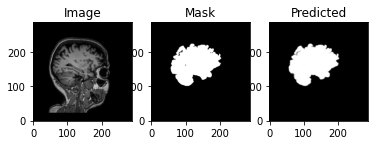

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_slice = cv2.imread('/content/drive/My Drive/Projekt 2/train_ax0/images/all_images/3_120.png', cv2.IMREAD_UNCHANGED)
mask_slice = cv2.imread('/content/drive/My Drive/Projekt 2/train_ax0/labels/all_labels/3_120.png', cv2.IMREAD_UNCHANGED)
fig, axes = plt.subplots(1, 3)
axes[0].imshow(image_slice.T, cmap="gray", origin="lower")
axes[1].imshow(mask_slice.T, cmap="gray", origin="lower")
prediction = autoencoder((image_slice/255)[None, :])
axes[2].imshow(np.squeeze(prediction).T, cmap="gray", origin="lower")
axes[0].set_title("Image")
axes[1].set_title("Mask")
axes[2].set_title("Predicted")
print(image_slice.shape, mask_slice.shape, mask_slice.max())
print(image_slice.max(), image_slice.min())
print(mask_slice.max(), mask_slice.min())

0.807843137254902 0.0
0.8980392156862745 0.0
0.8 0.0
0.99991727 7.6235647e-06
0.99989533 2.0975579e-06
0.99993646 2.3369748e-06


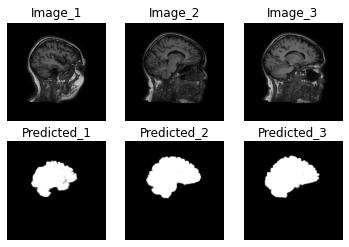

In [ ]:
import cv2
import matplotlib.pyplot as plt
data, affine = load_raw_volume(path_X_test[0])
data = (255.0 / data.max() * (data - data.min())).astype(np.uint8) / 255
img_1 = pad(data[90], 288, 288)
img_2 = pad(data[120], 288, 288)
img_3 = pad(data[140], 288, 288)
mask_1 = np.squeeze(autoencoder.predict((img_1)[None, :]))
mask_2 = np.squeeze(autoencoder.predict((img_2)[None, :]))
mask_3 = np.squeeze(autoencoder.predict((img_3)[None, :]))
fig, axes = plt.subplots(2, 3)
axes[0, 0].imshow(img_1.T, cmap="gray", origin="lower")
axes[0, 1].imshow(img_2.T, cmap="gray", origin="lower")
axes[0, 2].imshow(img_3.T, cmap="gray", origin="lower")
axes[1, 0].imshow(mask_1.T, cmap="gray", origin="lower")
axes[1, 1].imshow(mask_2.T, cmap="gray", origin="lower")
axes[1, 2].imshow(mask_3.T, cmap="gray", origin="lower")
axes[0, 0].axis('off')
axes[0, 1].axis('off')
axes[0, 2].axis('off')
axes[1, 0].axis('off')
axes[1, 1].axis('off')
axes[1, 2].axis('off')
axes[0, 0].set_title("Image_1")
axes[0, 1].set_title("Image_2")
axes[0, 2].set_title("Image_3")
axes[1, 0].set_title("Predicted_1")
axes[1, 1].set_title("Predicted_2")
axes[1, 2].set_title("Predicted_3")
print(img_1.max(), img_1.min())
print(img_2.max(), img_2.min())
print(img_3.max(), img_3.min())
print(mask_1.max(), mask_1.min())
print(mask_2.max(), mask_2.min())
print(mask_3.max(), mask_3.min())

Predykcje

In [ ]:
from pathlib import Path
import shutil
shutil.rmtree('/content/Predictions')
predictions_base_path = Path('/content/Predictions')
first_dataset_predictions_path = predictions_base_path / 'first'
second_dataset_predictions_path = predictions_base_path / 'second'

first_dataset_predictions_path.mkdir(exist_ok=True, parents=True)
second_dataset_predictions_path.mkdir(exist_ok=True, parents=True)

In [ ]:
!pip install --upgrade nibabel

Requirement already up-to-date: nibabel in /usr/local/lib/python3.6/dist-packages (3.1.1)


In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from typing import Tuple, List
from pathlib import Path


def load_raw_volume(path: Path) -> Tuple[np.ndarray, np.ndarray]:
  data: nib.Nifti1Image = nib.load(str(path))
  data = nib.as_closest_canonical(data)
  raw_data = data.get_fdata(caching='unchanged', dtype=np.float32)
  return raw_data, data.affine


def load_labels_volume(path: Path) -> np.ndarray:
  return load_raw_volume(path)[0].astype(np.uint8)


def save_labels(data: np.ndarray, affine: np.ndarray, path: Path):
  nib.save(nib.Nifti1Image(data, affine), str(path))


def show_slices(slices: List[np.ndarray]):
   fig, axes = plt.subplots(1, len(slices))
   for i, data_slice in enumerate(slices):
       axes[i].imshow(data_slice.T, cmap="gray", origin="lower")

In [ ]:
def pad(img, h, w):
    img = np.expand_dims(img , 2)
    #  in case when you have odd number
    top_pad = np.floor((h - img.shape[0]) / 2).astype(np.uint16)
    bottom_pad = np.ceil((h - img.shape[0]) / 2).astype(np.uint16)
    right_pad = np.ceil((w - img.shape[1]) / 2).astype(np.uint16)
    left_pad = np.floor((w - img.shape[1]) / 2).astype(np.uint16)
    result = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad), (0, 0)), mode='constant', constant_values=0)
    return np.copy(np.squeeze(result))

In [ ]:
def unpad(img, h, w):

    #  in case when you have odd number
    top_pad = np.floor((img.shape[0] - h) / 2).astype(np.uint16)
    bottom_pad = np.ceil((img.shape[0] - h) / 2).astype(np.uint16)
    right_pad = np.ceil((img.shape[1] - w) / 2).astype(np.uint16)
    left_pad = np.floor((img.shape[1] - w) / 2).astype(np.uint16)

    return img[top_pad:(img.shape[0] - bottom_pad), left_pad:(img.shape[1] - right_pad)]

/content/FirstDataset/test/ac8f97a9f9770c17894bffe2ceedba08.nii.gz


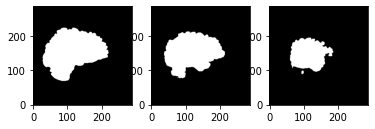

/content/FirstDataset/test/b2614e0e8776c9d6ee3fd75c01823185.nii.gz


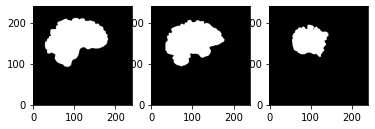

/content/FirstDataset/test/9be1a6385279fcdfb613d0cdf73c00a7.nii.gz


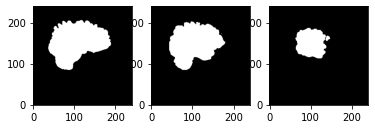

/content/FirstDataset/test/a7973aaf43e08fd4ceaa47bcc57bebc2.nii.gz


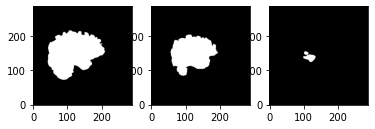

/content/FirstDataset/test/7b2f8a4a520230a3e0da62b9763730a5.nii.gz


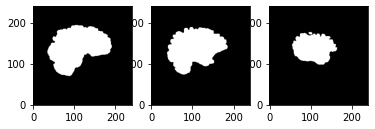

/content/FirstDataset/test/a397a235d426b16ed9062ea5c3e8e734.nii.gz


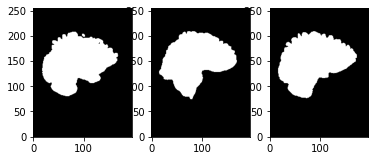

/content/FirstDataset/test/5751d91b1db319f0b0f5e27cdfb6e508.nii.gz


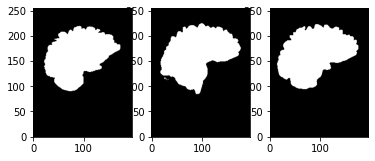

/content/FirstDataset/test/ac3fefaf4abbd6ab735fbd6ca6faa90c.nii.gz


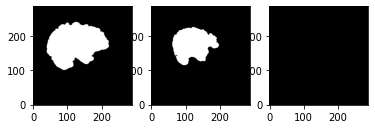

/content/FirstDataset/test/1992cabe5774b6abd050f8dc7c8247e9.nii.gz


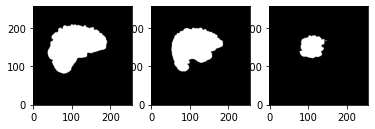

/content/FirstDataset/test/3423ba333d3e07ba3492324dbe424827.nii.gz


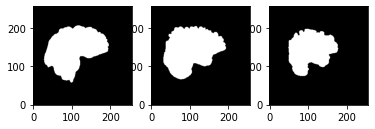

/content/FirstDataset/test/9ae8802dffab9bd218f1398a96f5e66e.nii.gz


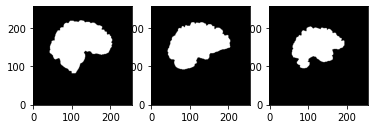

/content/FirstDataset/test/822038956654005e13e96fda68b5c20e.nii.gz


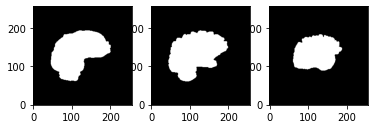

/content/FirstDataset/test/a8ba9927987a6a44a7b191b3af227cf8.nii.gz


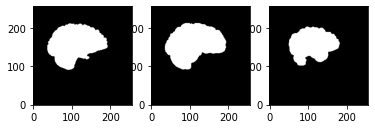

/content/FirstDataset/test/58a8d8769de9dff220a9f520d4a30b52.nii.gz


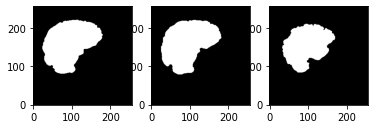

/content/FirstDataset/test/1c3064790751e45d903399e9998af51b.nii.gz


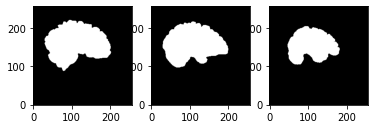

/content/FirstDataset/test/780913c65053b3d29a96856ecc02b654.nii.gz


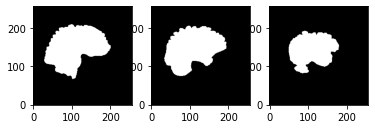

/content/FirstDataset/test/f3c45360b3a12275c6148dce5ed3d8b5.nii.gz


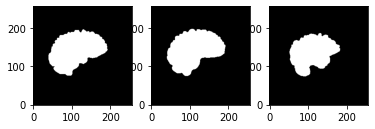

/content/FirstDataset/test/63fa3338a2cdce261fc044ed1afde7a4.nii.gz


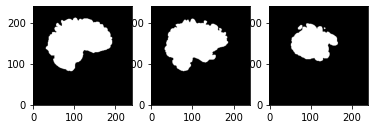

/content/FirstDataset/test/94596ee05f924881b9b11ded19933ca1.nii.gz


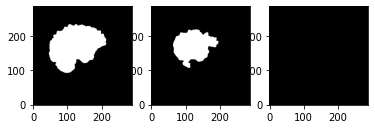

/content/FirstDataset/test/07651dc2bafb71d6f3de109a5610160f.nii.gz


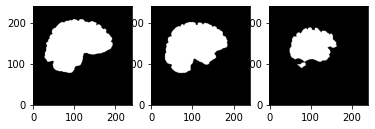

/content/FirstDataset/test/11a79c48577d879e9d52a874df3c0184.nii.gz


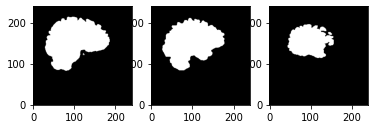

/content/FirstDataset/test/1fd6fd84052d08152830a735dc749965.nii.gz


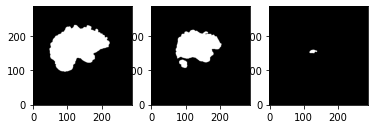

/content/FirstDataset/test/507bf3dd77bb2f55e3977060fbe3c129.nii.gz


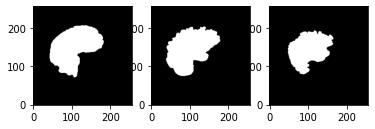

/content/FirstDataset/test/ecc8925dd637bd735564576cc2b69ef8.nii.gz


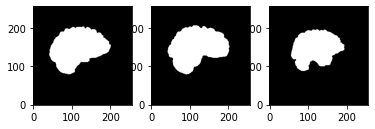

/content/FirstDataset/test/befd2995b6337f1427a97c7f478821bc.nii.gz


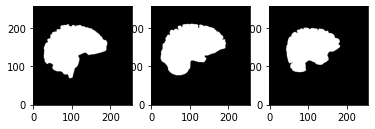

/content/FirstDataset/test/03453fb1d5c8eb73d501cbf2e913e9ef.nii.gz


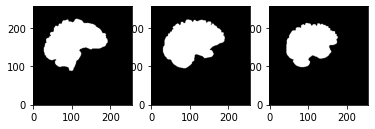

/content/FirstDataset/test/ae4c2fcb653e5b3ce978c783121722c8.nii.gz


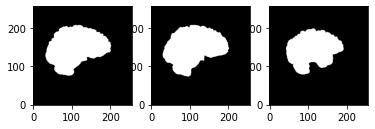

/content/FirstDataset/test/8c27a5e3e83e2e28bc52ca83291644f8.nii.gz


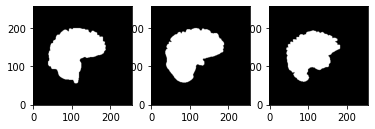

/content/FirstDataset/test/8af689e154c363a263c89943cfaa3e90.nii.gz


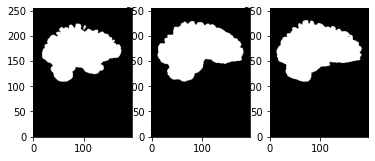

/content/FirstDataset/test/98c79e6138f2987f4f0b4d59e97bfcec.nii.gz


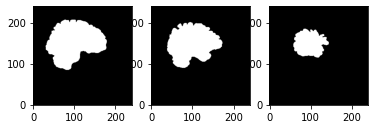

/content/FirstDataset/test/026719ab1b8e2af45a41ee5b629a12bd.nii.gz


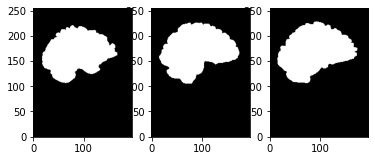

/content/FirstDataset/test/de75b10a148f259ea64dfd9f43670586.nii.gz


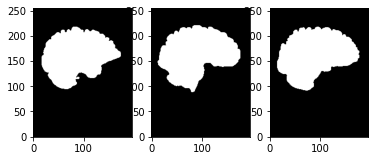

/content/FirstDataset/test/ca84bd2d04360264741d3679f47929fc.nii.gz


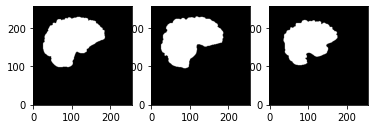

/content/FirstDataset/test/74754999f39999d6c84baaef2d710e85.nii.gz


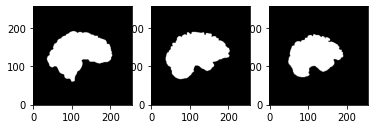

/content/FirstDataset/test/3fff825c5d06080429479fd33b322550.nii.gz


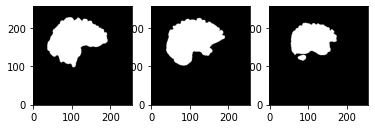

/content/FirstDataset/test/ac847f569ea517e88242a22132b9948a.nii.gz


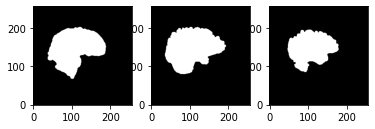

/content/FirstDataset/test/d2cfba48dca87d009fe40df18e1a5207.nii.gz


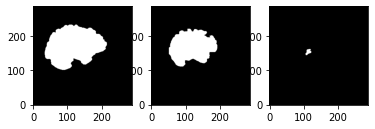

/content/FirstDataset/test/11b2fda921661f5a244ad3838689d007.nii.gz


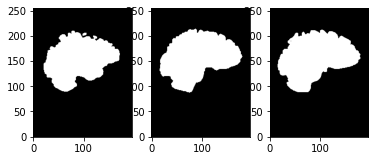

/content/FirstDataset/test/808a0c0f5078dd5bd27075bfebc9e44e.nii.gz


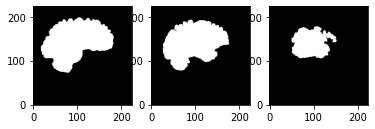

/content/FirstDataset/test/af81e5dd9e754a5228915b85347d5aa6.nii.gz


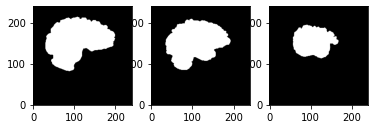

/content/FirstDataset/test/8da1504a4b42f0ec48de5ef7ffc5f2df.nii.gz


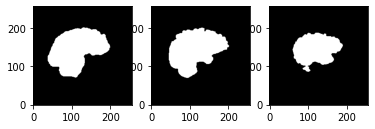

/content/FirstDataset/test/d68e8b4d18adcbd0d0deb7a783d70501.nii.gz


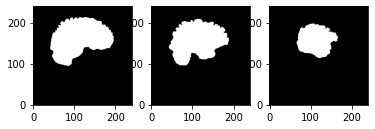

/content/FirstDataset/test/91011ce77f5c743e1fbbc47564403a87.nii.gz


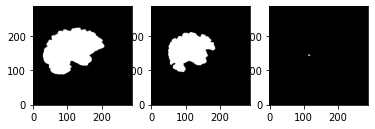

/content/FirstDataset/test/9e0d0d0f40e55e63cf8d218f559b162c.nii.gz


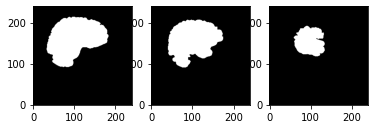

/content/FirstDataset/test/65fd8f5f1e0e9b433a0f755b02a46b20.nii.gz


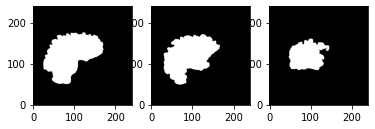

/content/FirstDataset/test/c6ef546fe22dc45dea342c8b3367dd1f.nii.gz


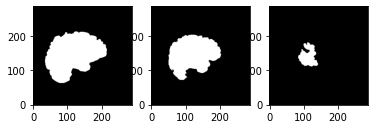

/content/FirstDataset/test/372af0b53b7ee53a6f53472ad88d8965.nii.gz


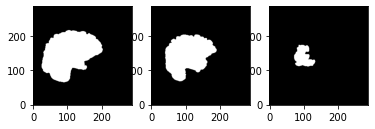

/content/FirstDataset/test/d0858c4acdecad0b89bae8e1c55ee92c.nii.gz


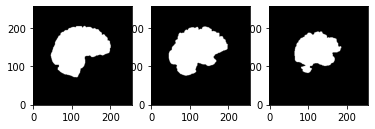

/content/FirstDataset/test/67b0fa7c242e10a2ec7108d6088d2649.nii.gz


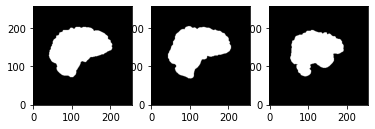

/content/FirstDataset/test/073ca51b6f1b2baa300ca47dbf10ea02.nii.gz


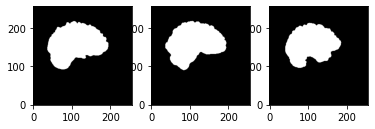

/content/FirstDataset/test/64051b3483da339bf5792b5820faf6ae.nii.gz


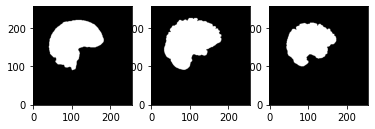

/content/FirstDataset/test/c7d234c933b39795d7ba4bf48265dc94.nii.gz


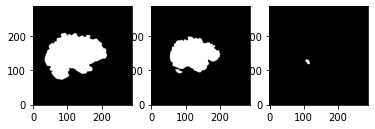

/content/FirstDataset/test/3d477c3f6dbf4219c41c72ac0cdfc4a2.nii.gz


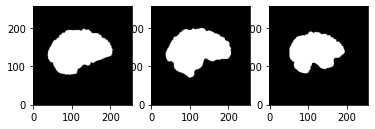

/content/FirstDataset/test/bde813ee1e995313a15263d7f2cb6ea3.nii.gz


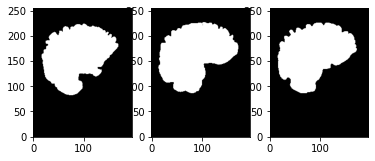

/content/FirstDataset/test/c5226d116bf06fcda3bba8baf9e9229f.nii.gz


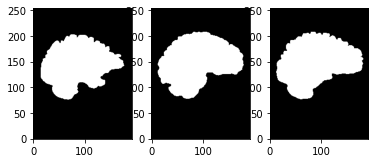

/content/FirstDataset/test/61f6bc0dedcfa12482c29cef8a9bd8d4.nii.gz


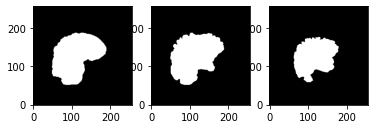

/content/FirstDataset/test/54b2c785e49dd33b2dae34250442533e.nii.gz


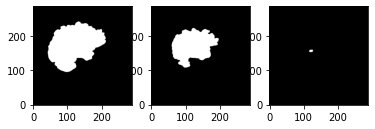

/content/FirstDataset/test/6951d62abf9014b65a5f3e55540e1a26.nii.gz


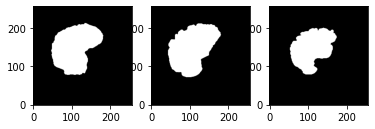

/content/FirstDataset/test/a1386ad46e7593d154c7b231dc700f29.nii.gz


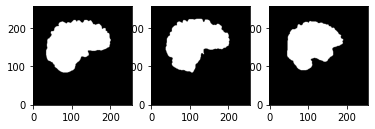

/content/FirstDataset/test/fb5eb2e9ce635a07365161ba4bc4437d.nii.gz


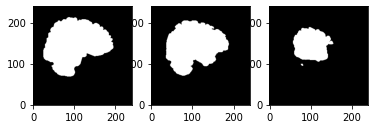

/content/FirstDataset/test/d2a6a50deb9f3d386778591259b5e531.nii.gz


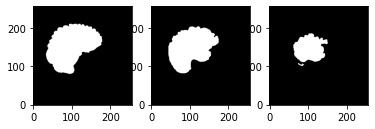

/content/FirstDataset/test/5b3cb52ff434faef2e26494927393d66.nii.gz


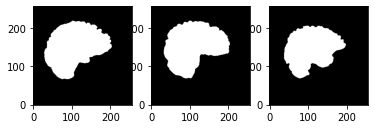

/content/FirstDataset/test/1f405c35c19d7426131d8c8021ed7e3c.nii.gz


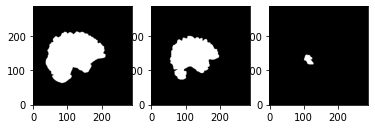

/content/FirstDataset/test/82922aea8b29f4daae228061912634f4.nii.gz


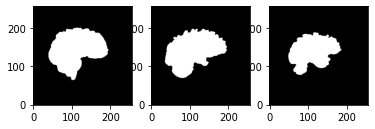

/content/FirstDataset/test/1745516560ec9e5ab461eb971ea00f29.nii.gz


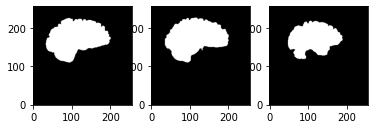

/content/FirstDataset/test/d5394a622174b44af897d5e9d60c4739.nii.gz


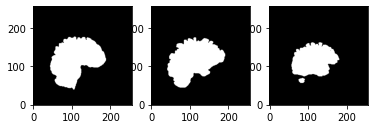

/content/FirstDataset/test/9fd8ecf23ffc7da1c0708ea1428eba96.nii.gz


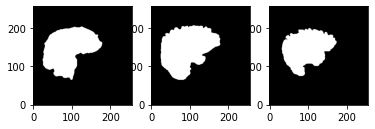

/content/FirstDataset/test/8651a1735cb38201e36845fdfa4cb388.nii.gz


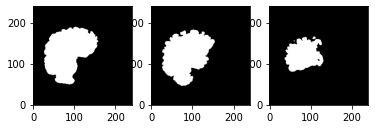

/content/FirstDataset/test/2c10e47f4b17b611666ca076d7b04024.nii.gz


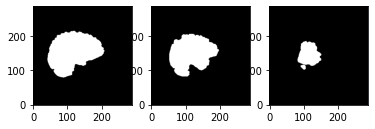

/content/FirstDataset/test/863e3c2fbf3d5751daf6767e62f851e1.nii.gz


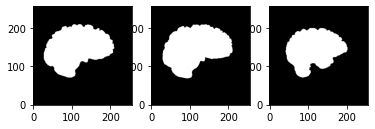

/content/FirstDataset/test/6bad4c29bf8709bfeb96be167d34b30f.nii.gz


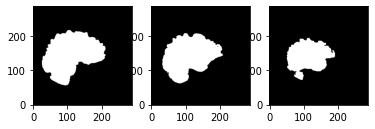

/content/FirstDataset/test/f4e6789c61b7875a6e80e9f95372d2c8.nii.gz


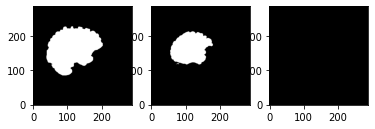

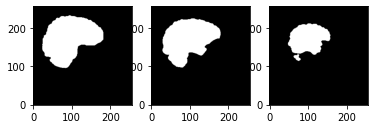

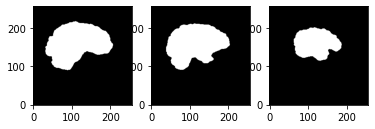

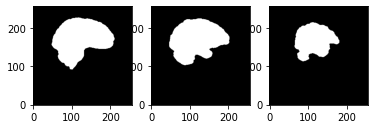

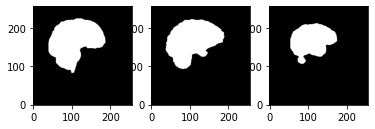

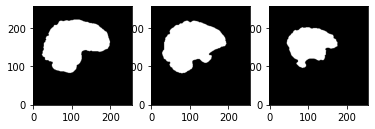

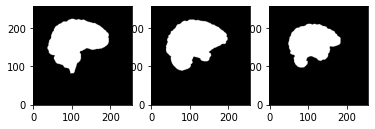

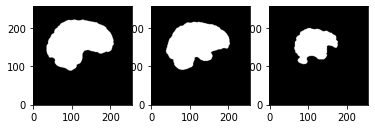

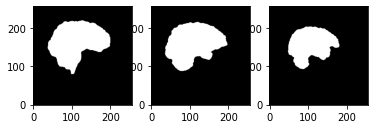

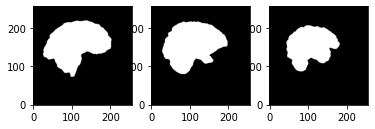

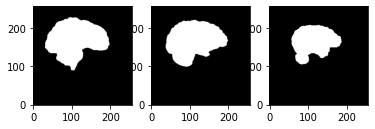

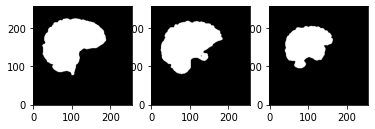

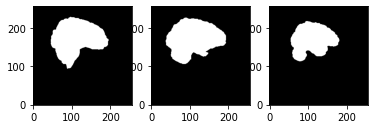

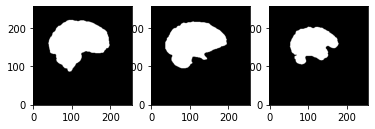

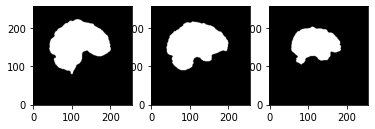

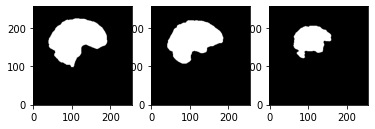

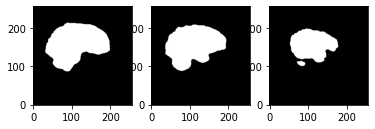

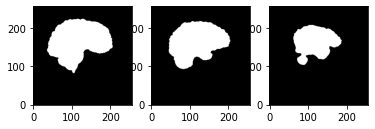

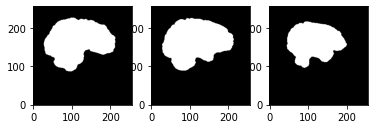

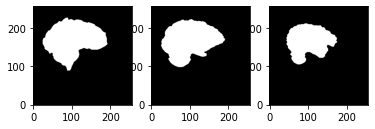

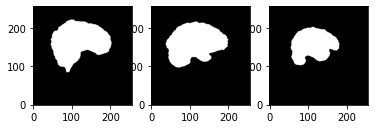

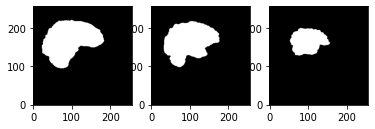

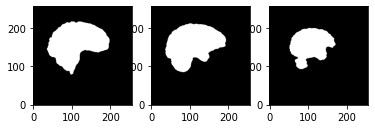

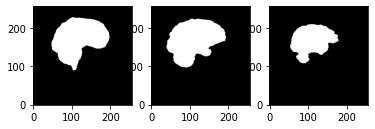

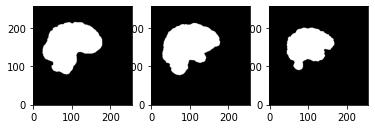

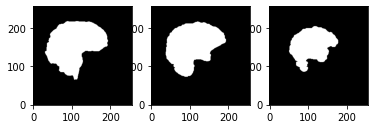

In [ ]:
first_dataset_test_path = Path('/content/FirstDataset/test')
second_dataset_test_path = Path('/content/SecondDataset/test')

for scan_path in first_dataset_test_path.iterdir():
  data, affine = load_raw_volume(scan_path)
  labels = np.zeros(data.shape, dtype=np.uint8)
  data = (255.0 / data.max() * (data - data.min())).astype(np.uint8) / 255
  print(scan_path)
  # Tutaj należy przeiterować się na przykład po jednej z osi, wykonać predykcję dla każdego przekroju i wpisać do macierzy labels
  # UWAGA - maska powinna zawierać jedynie wartości 0 i 1
  # UWAGA - predykcje są liczbami zmiennoprzecinkowymi z zakresu 0 do 1 - należy je zbinaryzować wybierając jakiś próg (na przykład 0.5)
  
  # Przykład dla osi 'z':
  x_size, y_size, z_size = data.shape
  #for z_index in range(z_size):
  #  data_slice = data[:, :, z_index]
  #  prediction = np.random.randint(0, 2, size=data_slice.shape, dtype=np.uint8)
  #  labels[:, :, z_index] = prediction

  for x_index in range(x_size):
      data_slice = data[x_index]
      test_image = pad(data_slice, 288, 288)
      prediction = autoencoder.predict(test_image[None, :])+0.5
      labels[x_index] = unpad(np.squeeze(prediction), data_slice.shape[0] , data_slice.shape[1])
  show_slices([labels[100], labels[120], labels[140]])
  plt.show()
  save_labels(labels, affine, first_dataset_predictions_path / scan_path.name)

for scan_path in second_dataset_test_path.iterdir():
  data, affine = load_raw_volume(scan_path / 'T1w.nii.gz')
  labels = np.zeros(data.shape, dtype=np.uint8)
  data = (255.0 / data.max() * (data - data.min())).astype(np.uint8) / 255

  # Tutaj należy przeiterować się na przykład po jednej z osi, wykonać predykcję dla każdego przekroju i wpisać do macierzy labels
  # UWAGA - maska powinna zawierać jedynie wartości 0 i 1
  # UWAGA - predykcje są liczbami zmiennoprzecinkowymi z zakresu 0 do 1 - należy je zbinaryzować wybierając jakiś próg (na przykład 0.5)
  x_size, y_size, z_size = data.shape

  for x_index in range(x_size):
      data_slice = data[x_index]
      test_image = pad(data_slice, 288, 288)
      prediction = autoencoder.predict(test_image[None, :])+0.5
      labels[x_index] = unpad(np.squeeze(prediction), data_slice.shape[0] , data_slice.shape[1])
  show_slices([labels[100], labels[120], labels[140]])
  plt.show()
  save_labels(labels, affine, second_dataset_predictions_path / f'{scan_path.name}.nii.gz')

In [ ]:
from zipfile import ZipFile 
import os 
  
def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths         
  
# path to folder which needs to be zipped 
directory = '/content/Predictions'

# calling function to get all file paths in the directory 
file_paths = get_all_file_paths(directory) 
  
# printing the list of all files to be zipped 
print('Following files will be zipped:') 
for file_name in file_paths: 
    print(file_name) 
  
# writing files to a zipfile 
with ZipFile('Predictions.zip','w') as zip: 
# writing each file one by one 
     for file in file_paths: 
         zip.write(file) 
  
print('All files zipped successfully!')

Following files will be zipped:
/content/Predictions/second/599401e6d3c9a0e13715dc2d707128a4.nii.gz
/content/Predictions/second/5454aea6c2a47b8694677a3e00aed8d6.nii.gz
/content/Predictions/second/7847787252a27ab1a17ed933da875052.nii.gz
/content/Predictions/second/abee833d267e00022d68f2d6f8dde496.nii.gz
/content/Predictions/second/f02ba4b50c982c8eb092978dab220b34.nii.gz
/content/Predictions/second/24068246382d571daef98f9c7d9597c2.nii.gz
/content/Predictions/second/1ece697ca1fad7831d38f8aee4a001e3.nii.gz
/content/Predictions/second/72d89c7ce5b2d5f6575482107f4ed319.nii.gz
/content/Predictions/second/6f3b0a448096afaa1f819018ec464159.nii.gz
/content/Predictions/second/dbe06e3994cb4be7e8428aae75d533bf.nii.gz
/content/Predictions/second/691e0c744367b23efa5273c54db43f7c.nii.gz
/content/Predictions/second/1bc70682de24f4e7d413edd7299f940f.nii.gz
/content/Predictions/second/ce5bca72f1acd7a90b0750a95a2b63ec.nii.gz
/content/Predictions/second/2b90f842c682b9b4a168eb5a25781813.nii.gz
/content/Predict

In [ ]:
from zipfile import ZipFile 
import os 

# writing files to a zipfile 
with ZipFile('output_audio.zip','w') as zip:
  zip.write('') 
  
print('All files zipped successfully!')

In [ ]:
!mv /content/Predictions.zip /content/drive/My\ Drive/Projekt\ 2

Sprawdzarka

In [ ]:
#Serwer nieaktywny
import requests
import zlib

for dataset_predictions_path in (first_dataset_predictions_path, second_dataset_predictions_path):
  for prediction_path in dataset_predictions_path.iterdir():
    prediction_name = prediction_path.name[:-7]  # Usuwanie '.nii.gz' z nazwy pliku
    prediction = nib.load(str(prediction_path))

    response = requests.post(f'http://vision.dpieczynski.pl:8080/{prediction_name}', data=zlib.compress(prediction.to_bytes()))
    if response.status_code == 200:
        print(dataset_predictions_path.name, prediction_path.name, response.json())
    else:
        print(f'Error processing prediction {dataset_predictions_path.name}/{prediction_name}: {response.text}')

ConnectionError: ignored